In [43]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
#Ridge and Lasso Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

In [44]:
# Reading the dataset

df = pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
total_records = df.shape[0]
total_records

1460

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [47]:
# Delte null data

df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','SaleCondition'],axis = 1, inplace = True)

In [48]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [49]:
# COunt the number of 0 in below coloumns 
print(df.BsmtCond.isin([0]).sum())
print(df['BsmtExposure'].isin([0]).sum())
print(df.BsmtFinType1.isin([0]).sum())
print(df.BsmtFinType2.isin([0]).sum())
print(df.GarageType.isin([0]).sum())
print(df.GarageFinish.isin([0]).sum())
print(df.MasVnrType.isin([0]).sum())
print(df.MasVnrArea.isin([0]).sum())

0
0
0
0
0
0
0
861


In [50]:
# replace with min value
df['MasVnrArea'].fillna(df['MasVnrArea'].min(), inplace=True) 

In [51]:
# Dropping ID,
df.drop(['Id'], inplace= True, axis=1)

In [52]:
df.MSSubClass.dtype

dtype('int64')

In [53]:
# Change data tyoe for MSSubclass to object as it should be a categorical variable
df.MSSubClass=df.MSSubClass.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [54]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [55]:
# Missing value treatment for Alley,PoolQC,Fence,MiscFeature,GarageCond, GarageQual,FireplaceQu 
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['BsmtQual'].fillna('No Basement', inplace=True)
df['GarageYrBlt'].fillna('No Garage', inplace=True)
df['GarageType'].fillna('No Garage', inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

 # We fixed the null value and missing value in data, now lets check the target variable

In [57]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

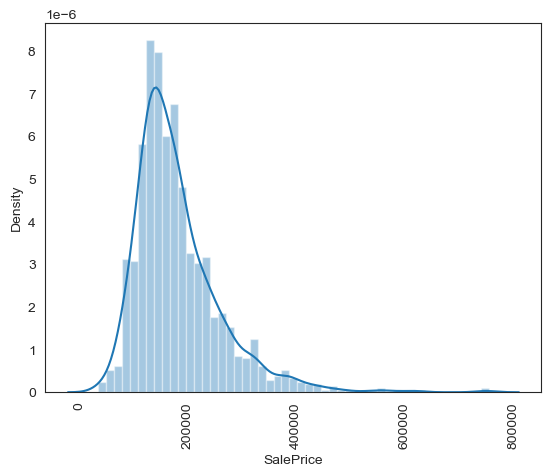

In [58]:
sns.distplot(df.SalePrice)
plt.xticks(rotation = 90)
plt.show()

In [59]:
df['SalePrice'].skew()

1.8828757597682129

Skewd to right, fix it using boxcox


In [60]:
from scipy import stats
df['SalePrice']=stats.boxcox(df['SalePrice'])[0]

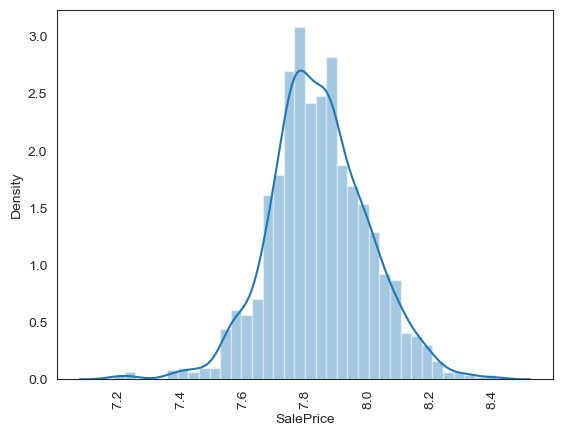

In [61]:
sns.distplot(df.SalePrice)
plt.xticks(rotation = 90)
plt.show()

In [62]:
df.shape

(1460, 74)

In [63]:
# Remodel date (same as construction date if no remodeling or additions)
#changing to 0 or 1 in this case, deriving new variable ISremodel

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1
    
df['IsRemodel'] = df.apply(checkForRemodel, axis=1)
df['IsRemodel']=df['IsRemodel'].astype('object')
df.IsRemodel.head()


0    0
1    0
2    1
3    1
4    0
Name: IsRemodel, dtype: object

In [64]:
# check count of remodelled

df.IsRemodel.value_counts()

0    764
1    696
Name: IsRemodel, dtype: int64

In [65]:
X=df.drop('SalePrice',axis=1)
X.shape

(1460, 74)

In [66]:
## drop cols of missing values more than 80 %
def getHighValueCounts():
    column = []
    for col in (df.columns):
        if(df[col].value_counts().max() >= (0.85*len(df))):
            column.append(col)
    return column

           
columnsToBeRemoved =getHighValueCounts()
print(len(columnsToBeRemoved))
df.drop(columnsToBeRemoved, axis = 1, inplace = True)
df.head()

27


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,IsRemodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2003.0,RFn,2,548,0,61,2,2008,7.932610,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,1976.0,RFn,2,460,298,0,5,2007,7.878263,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2001.0,RFn,2,608,0,42,9,2008,7.959618,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,1998.0,Unf,3,642,0,35,2,2006,7.774955,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,2000.0,RFn,3,836,192,84,12,2008,8.002875,0


In [67]:
df.shape

(1460, 48)

In [68]:
# deriving age of building
df.building_age = df.YrSold - df.YearBuilt
df.building_age.head()

0     5
1    31
2     7
3    91
4     8
dtype: int64

In [69]:
df.building_age.isnull().sum()

0

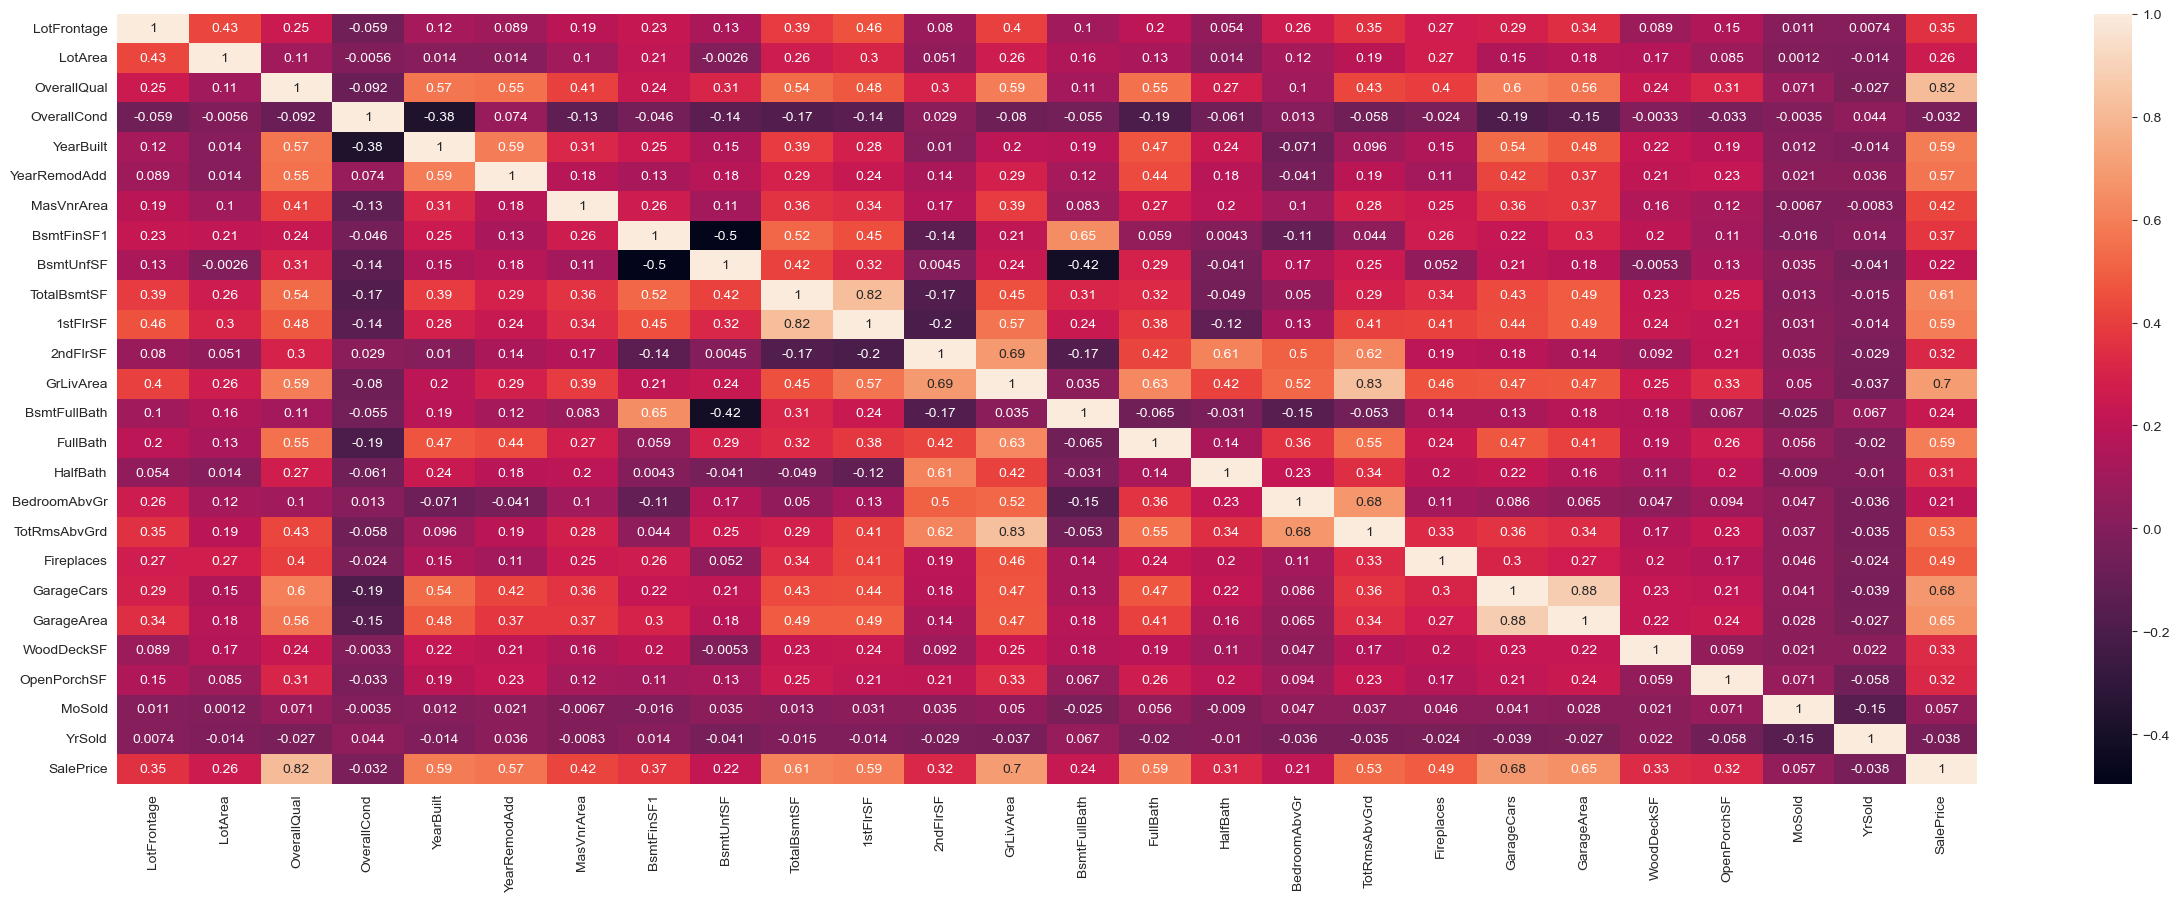

In [70]:
#Check the correlation of numerical columns
plt.figure(figsize = (30, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [71]:
X.shape

(1460, 74)

In [72]:
# derived new table for  containing catogorical variables
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageYrBlt,GarageFinish,IsRemodel
0,60,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,No,GLQ,Ex,Gd,Attchd,2003.0,RFn,0
1,20,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,...,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,1976.0,RFn,0
2,60,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,2001.0,RFn,1
3,70,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,1998.0,Unf,1
4,60,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,2000.0,RFn,0


# Ouliers treatment

In [73]:
##Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,...,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,7.842252
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,...,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,0.158258
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,7.185702
10%,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,74.900000,636.900000,...,2.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,3.000000,2006.000000,7.663770
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,7.745006
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,...,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,7.835733
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,...,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,7.942749
95%,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,1468.000000,1753.000000,...,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,8.103986
98%,124.000000,25251.620000,9.000000,8.000000,2008.000000,2008.000000,650.820000,1442.640000,1678.200000,2001.640000,...,4.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.820000,12.000000,2010.000000,8.175581


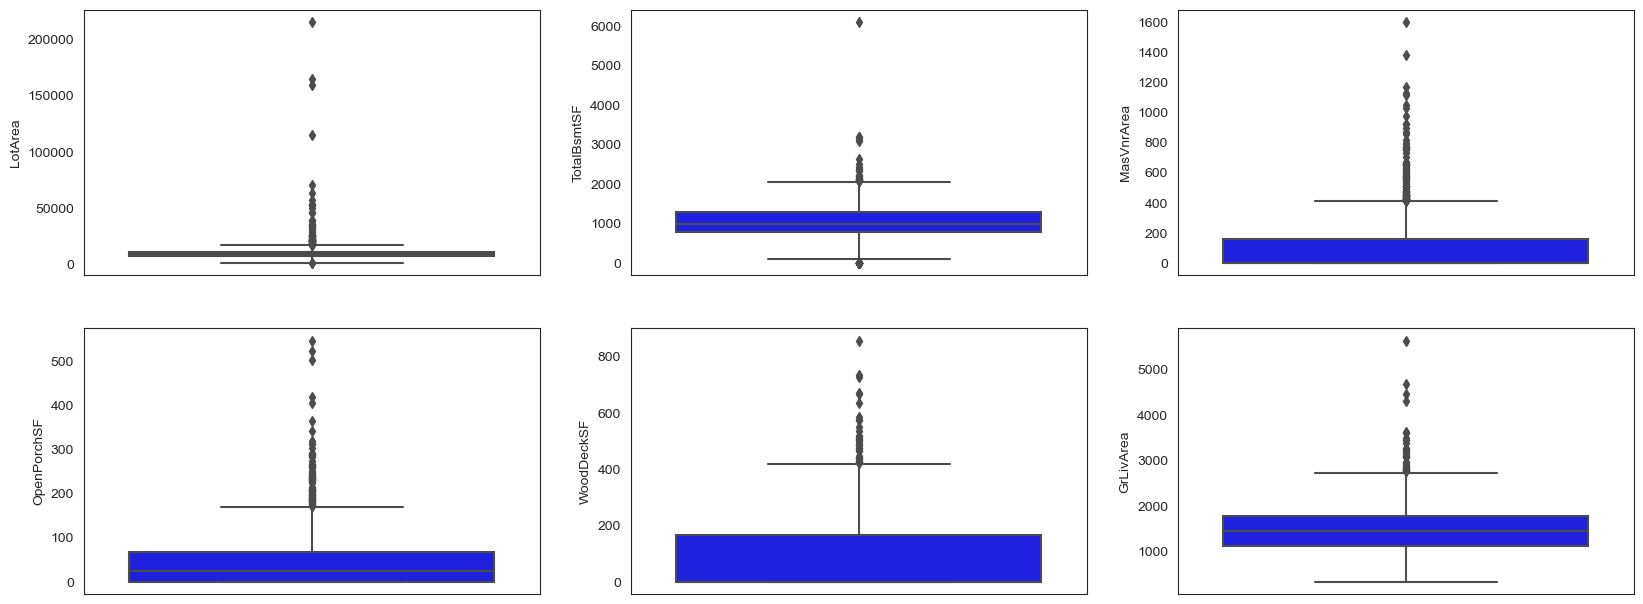

In [74]:
# visualize outlier in this variables:
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = df)


plt.show()

In [75]:
#Removing outliers
q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]


# Removing values beyond 99% for TotalBsmtSF
q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

In [76]:
#Dependent Variable
X=df.drop('SalePrice',axis=1)
X.shape

(1386, 47)

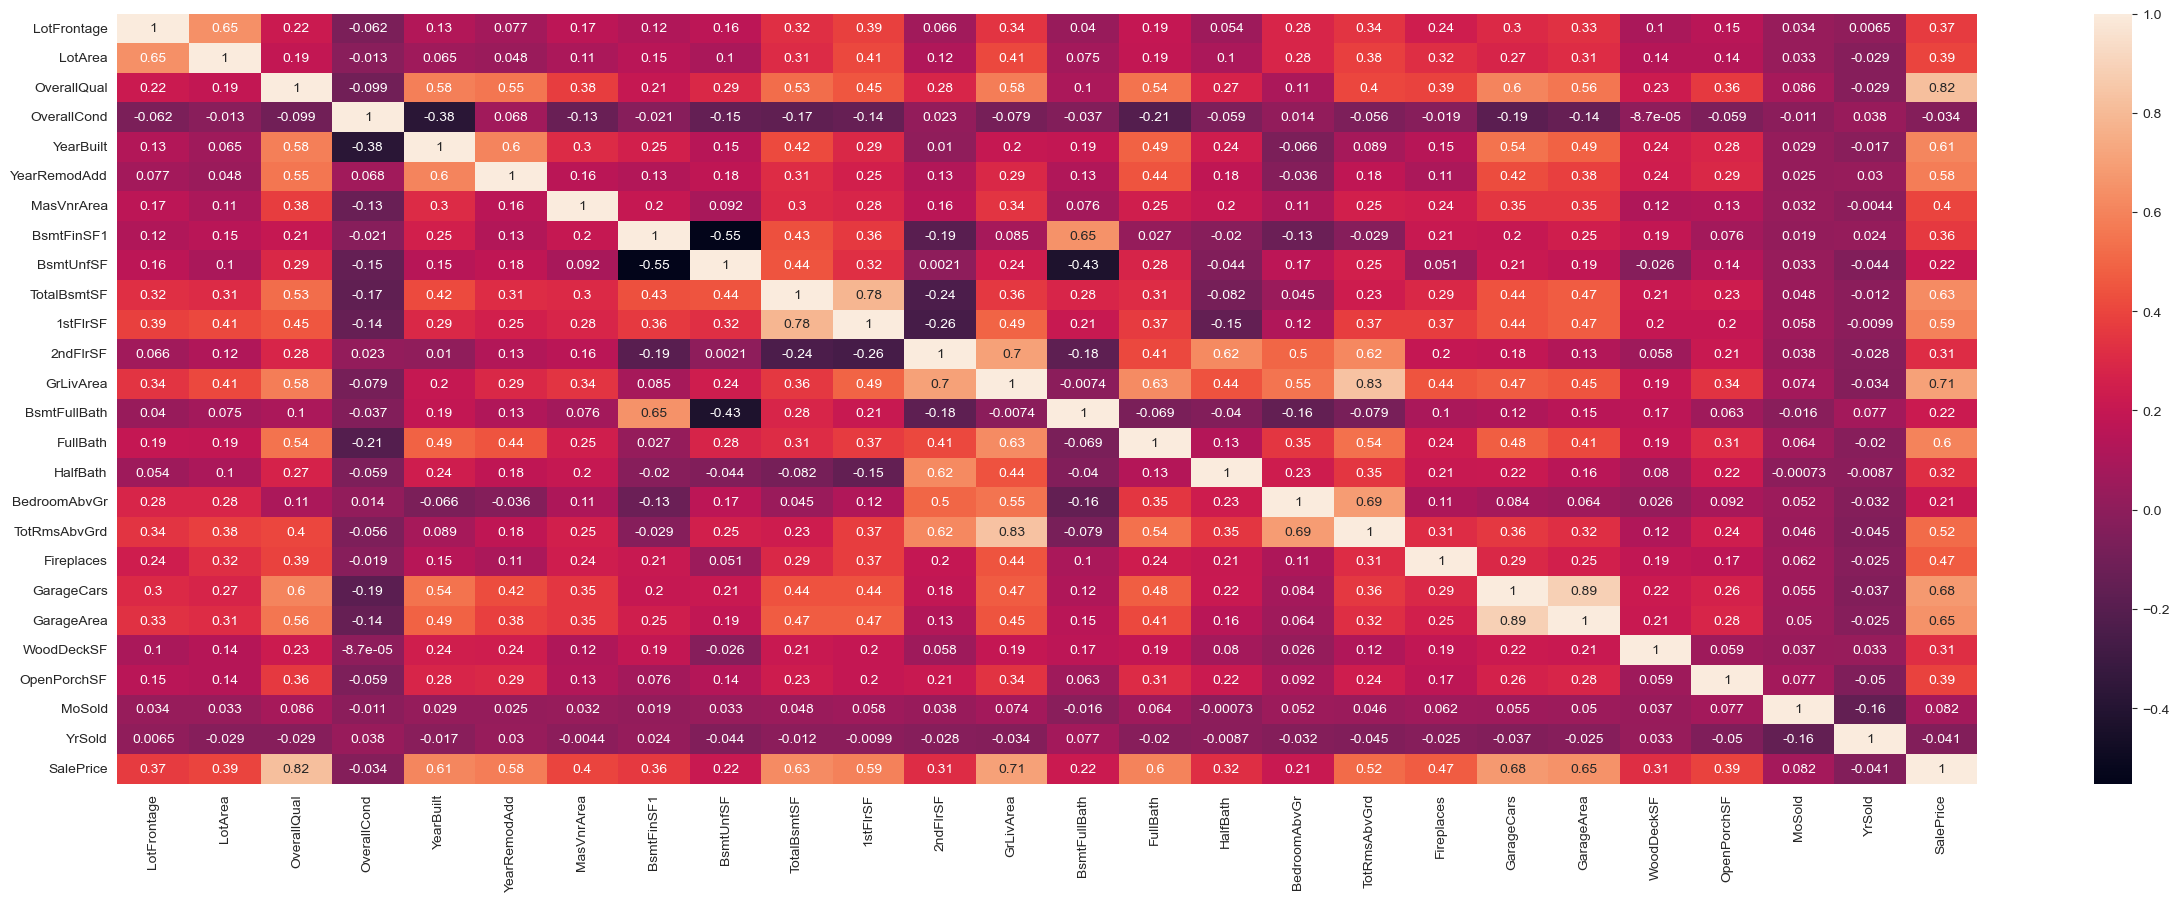

In [77]:
#Check the correlation on target var
plt.figure(figsize = (30, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [78]:
df.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF','Fireplaces'], axis = 1, inplace = True)
X.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF','Fireplaces'], axis = 1, inplace = True)

In [79]:
df.shape


(1386, 44)

## Data visualization

Sale price is also increasing with more cars in garages.
Sale price increasing with OverallQual: Overall material(9) and finish quality but few high selling houses don't have max OverallQual: Overall material and finish quality (5)
Sale price increasing with more fireplace and more rooms.
Sale price increasing with max FullBath: Full bathrooms above grade.


 mu = 7.84 and sigma = 0.15



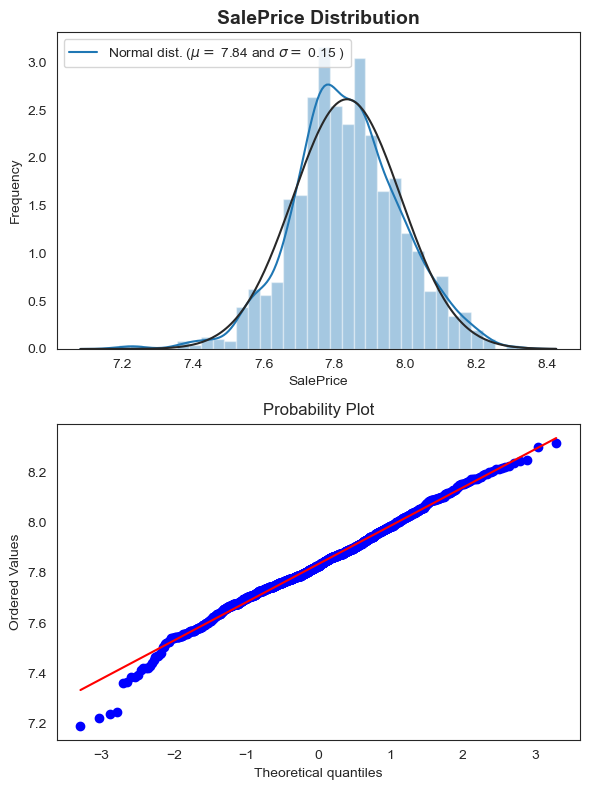

In [80]:
##Visualising the target variable 'SalePrice'
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

Observation: The points on the probplot don't lie along the red line. It shows the skewness in the data of the target variable. Hence, transforming the variable using log-transform.


 mu = 2.18 and sigma = 0.02



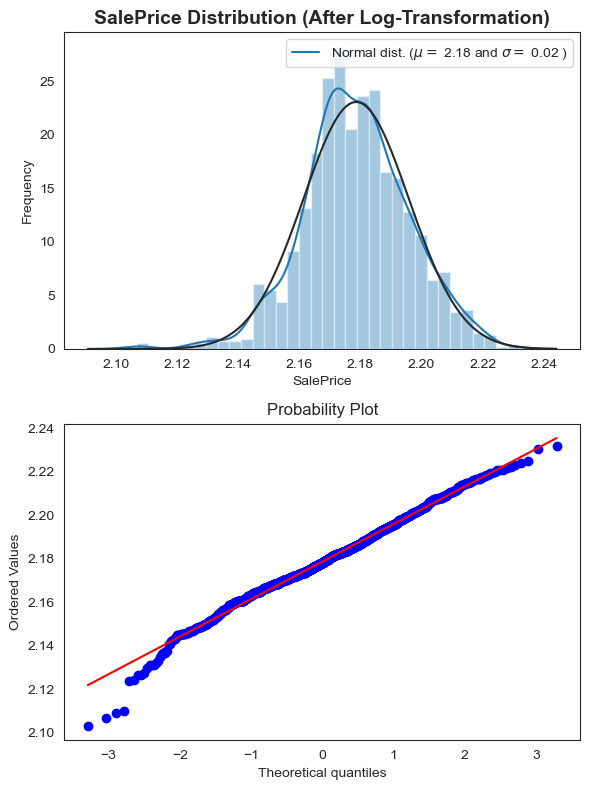

In [81]:
##Tranforming the target variable 'SalePrice' using Log-Transform. 

from scipy import stats
from scipy.stats import norm

##Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
df["SalePrice"] = np.log1p(df["SalePrice"])

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title("SalePrice Distribution (After Log-Transformation)", fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

In [82]:
##Let's define a function to draw scatterplots to understand relationship between 'dependent' and 'numeric' variables.
#(For three scatterplots together)
def scatter_plt_3(a, b, c):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (132)
    plt.subplot(1,3,2)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    plt.subplot(1,3,3)
    plt.scatter(x= df[c], y= df['SalePrice'])
    plt.title(("Sale price vs "+c), fontweight='bold', fontsize=15)
    plt.xlabel(c, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()
    
##(For two scatterplots together)
def scatter_plt_2(a,b):
    sns.set_style("white")
    plt.figure(figsize=(10,5), dpi=150)
    #subplot(121)
    plt.subplot(121)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale Price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot(122)
    plt.subplot(122)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

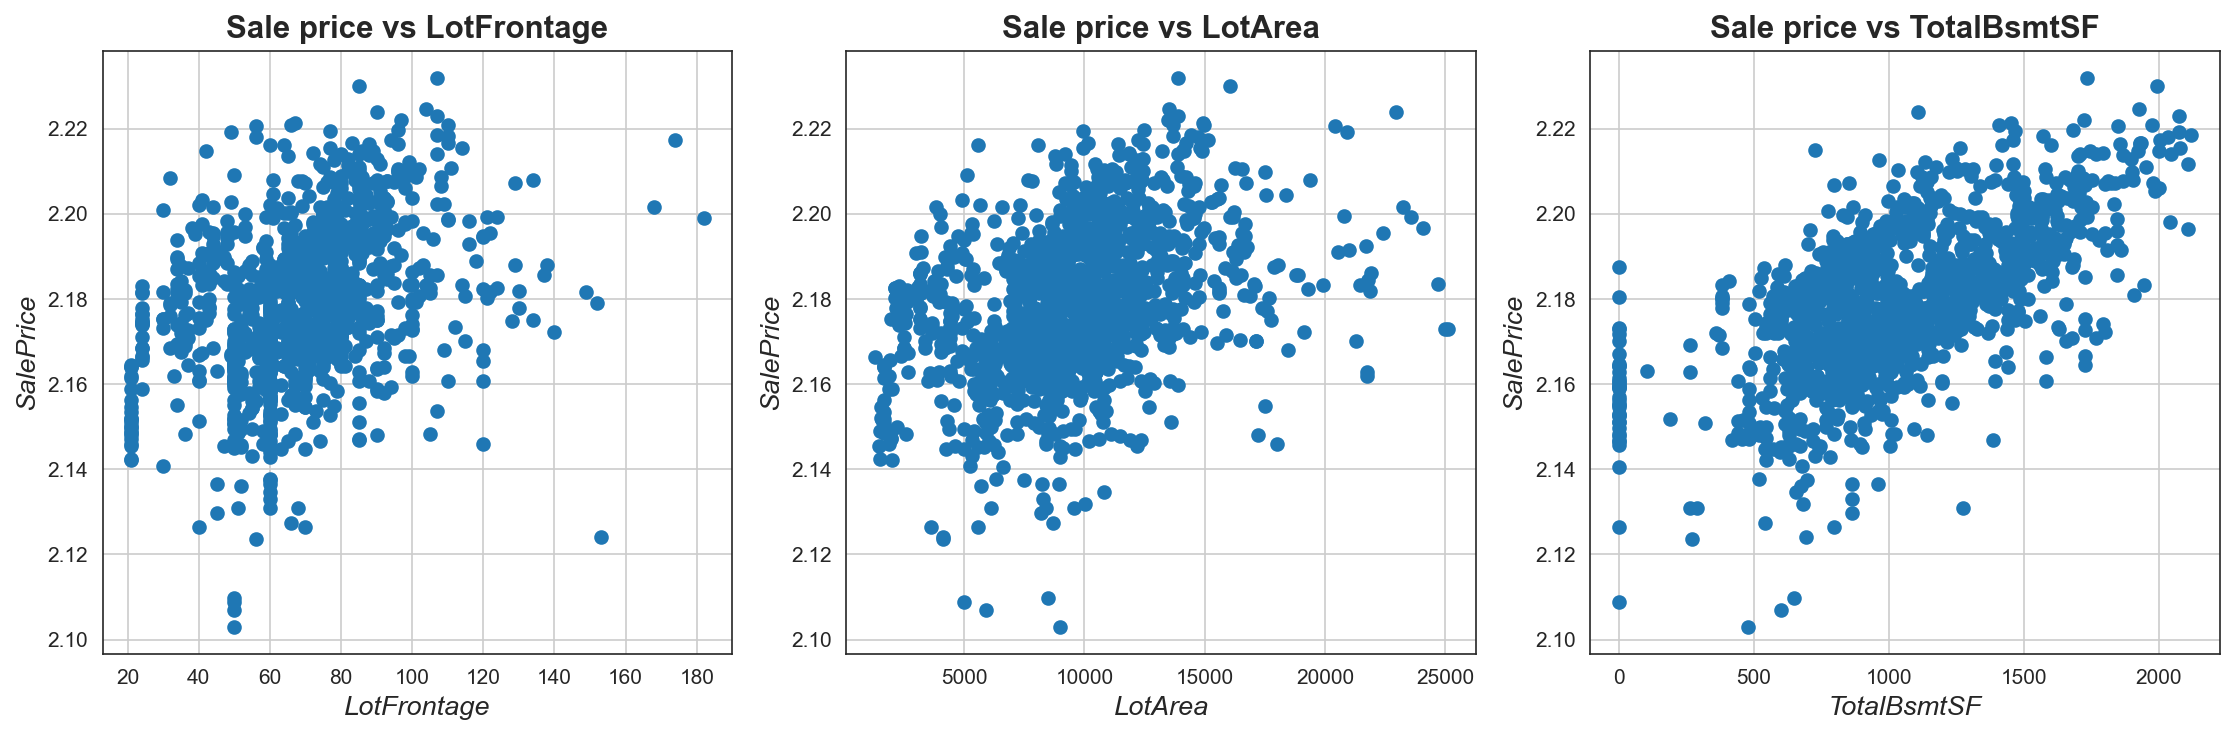

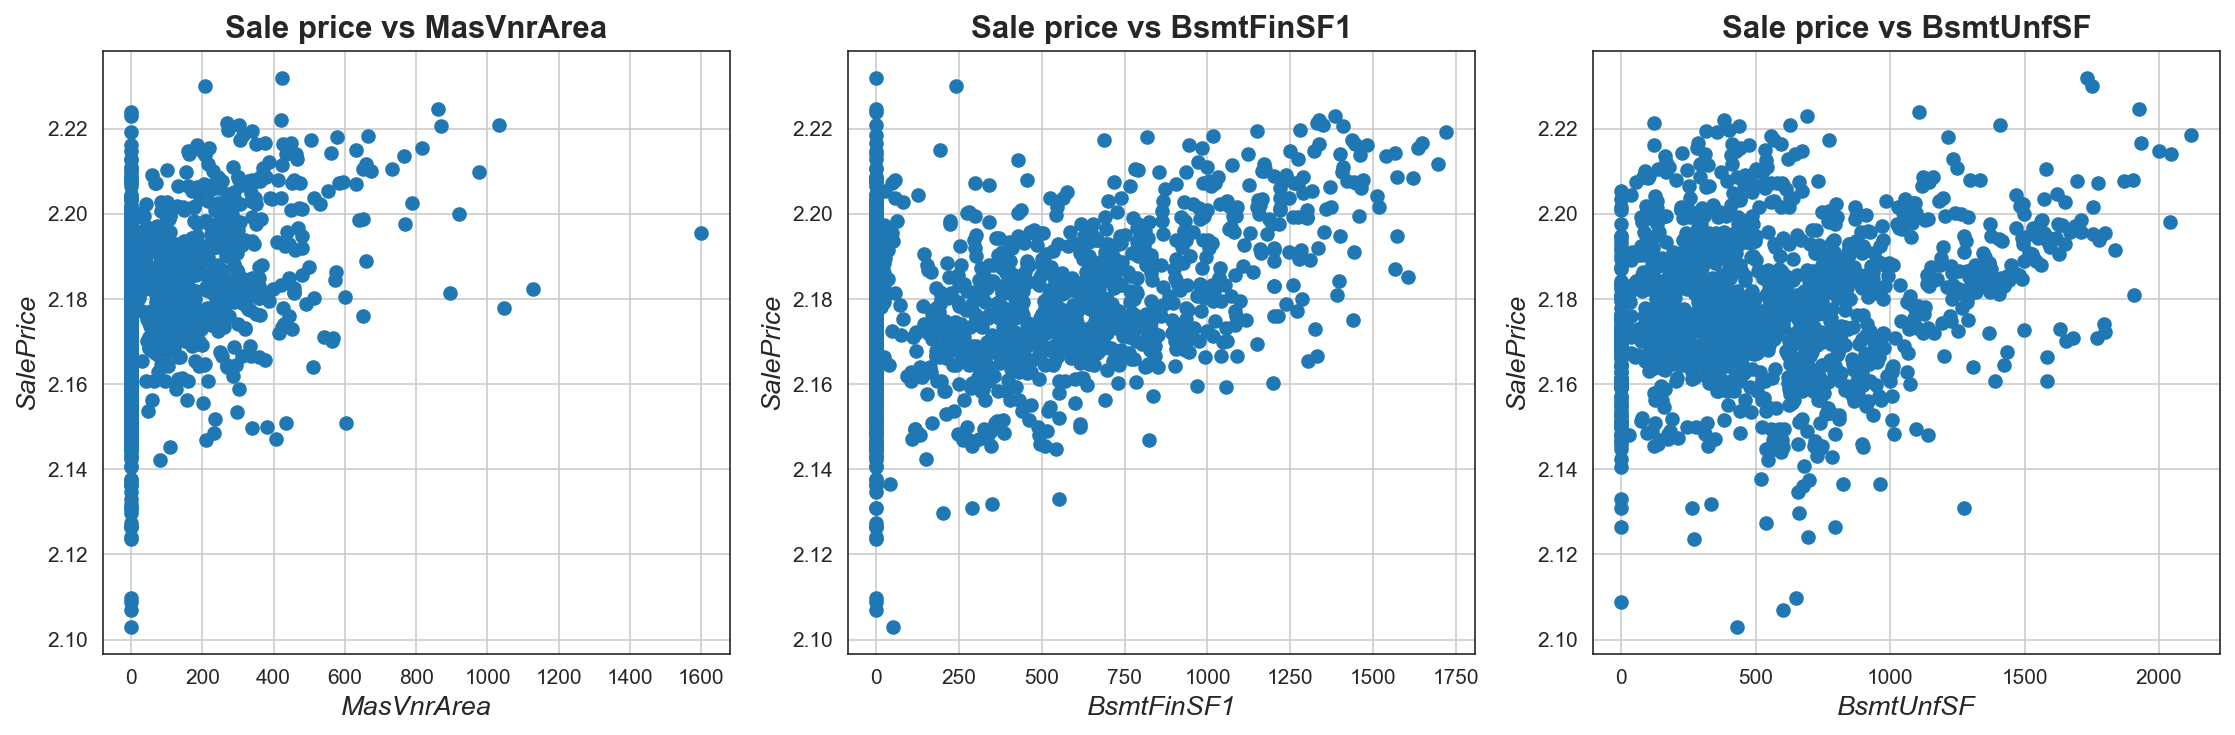

KeyError: '1stFlrSF'

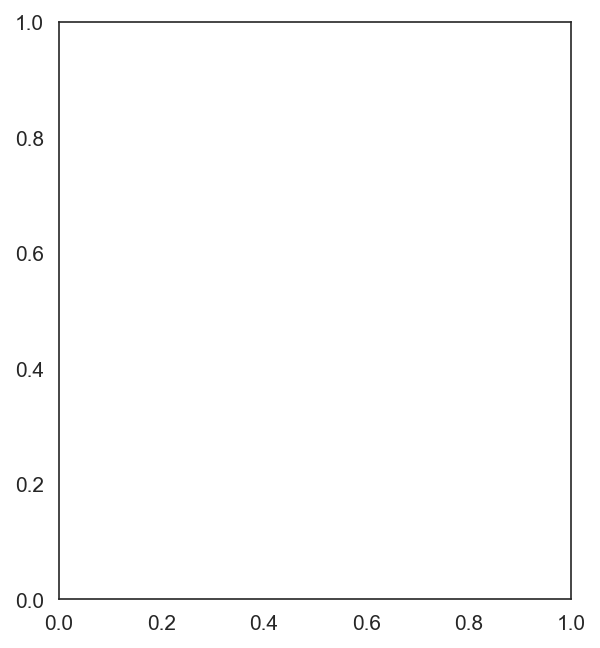

In [83]:
scatter_plt_3('LotFrontage', 'LotArea','TotalBsmtSF')
scatter_plt_3('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')
scatter_plt_3('1stFlrSF','2ndFlrSF', 'GrLivArea')
scatter_plt_2( 'GarageArea', 'WoodDeckSF')
scatter_plt_2('OpenPorchSF', 'AgeofProperty')

In [84]:
## Determine the percentage of data retained in the dataset

new_retained_data = round(100*(len(df)/total_records),2)
print(new_retained_data,"%")

94.93 %


In [85]:
#Also Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['GarageCars', '2ndFlrSF'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,KitchenQual,GarageType,GarageYrBlt,GarageFinish,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,IsRemodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,Gd,Attchd,2003.0,RFn,0,61,2,2008,2.189709,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,TA,Attchd,1976.0,RFn,298,0,5,2007,2.183606,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,Gd,Attchd,2001.0,RFn,0,42,9,2008,2.192728,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Gd,Detchd,1998.0,Unf,0,35,2,2006,2.171902,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,Gd,Attchd,2000.0,RFn,192,84,12,2008,2.197544,0


In [86]:
df.shape

(1386, 42)

In [87]:
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'GarageFinish' ], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,SalePrice,IsRemodel,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish
0,60,RL,65.0,8450,Inside,CollgCr,1Fam,2Story,7,5,...,2.189709,0,3,4,4.0,1.0,6.0,5,4,2.0
1,20,RL,80.0,9600,FR2,Veenker,1Fam,1Story,6,8,...,2.183606,0,3,3,4.0,4.0,5.0,5,3,2.0
2,60,RL,68.0,11250,Inside,CollgCr,1Fam,2Story,7,5,...,2.192728,1,2,4,4.0,2.0,6.0,5,4,2.0
3,70,RL,60.0,9550,Corner,Crawfor,1Fam,2Story,7,5,...,2.171902,1,2,3,3.0,1.0,5.0,4,4,1.0
4,60,RL,84.0,14260,FR2,NoRidge,1Fam,2Story,8,5,...,2.197544,0,2,4,4.0,3.0,6.0,5,4,2.0


In [88]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType','GarageYrBlt']
df = df.drop(orig_before_dum_cols, axis=1)

In [89]:
#checking and removing those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = df.drop(['SalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop 

['d_ExterQual',
 'd_BsmtQual',
 'd_BsmtFinType1',
 'd_KitchenQual',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd']

In [90]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [91]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['BldgType']

Number of categorical object type columns removed:  1 



,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage
0,65.0,8450,7,5,2003,2003,196.0,706,150,856,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,284,1262,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,434,920,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,540,756,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,490,1145,...,0,0,0,0,0,1,0,0,0,0


In [92]:
df.shape

(1386, 108)

In [93]:
##Inspecting null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage       16.88
d_BsmtExposure     2.74
d_GarageFinish     5.70
dtype: float64

In [94]:
print("LotFrontage Stats:\n",df.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats:\n",df.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count    1152.000000
mean       69.004340
std        21.427529
min        21.000000
10%        43.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        88.000000
90%        93.000000
95%       105.000000
98%       120.000000
99%       130.000000
100%      182.000000
max       182.000000
Name: LotFrontage, dtype: float64

MasVnrArea Stats:
 count    1386.000000
mean       96.230159
std       165.579241
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       157.750000
85%       252.000000
90%       312.000000
95%       425.750000
98%       580.500000
99%       681.700000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [95]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns
updated_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [96]:
df = df.drop(['d_GarageFinish','d_BsmtExposure' ], axis=1)


In [97]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = df.copy()

In [98]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['IsRemodel', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd

## Split Train Test 

In [99]:
#split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [100]:
# Scaling feature

##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [101]:
print(df_train.shape)
print(df_test.shape)

(970, 106)
(416, 106)


In [102]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [103]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

## Recursive Feature Elimination

In [104]:

numeric_null_cols = X_train.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

In [105]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [106]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip


[('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('MoSold', False, 3),
 ('YrSold', False, 3),
 ('d_LotShape', False, 3),
 ('d_HeatingQC', False, 3),
 ('IsRemodel', False, 3),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', False, 3),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 3),
 ('MSSubClass_85', False, 3),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 3),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 3),
 ('MSSubClass_190', True, 1),
 ('

In [107]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_190', 'LotConfig_FR2', 'MSZoning_FV', 'MSZoning_RL',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'Exterior2nd_Wd Shng', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Foundation_Wood', 'MasVnrTyp_Stone',
       'RoofStyle_Gamb

In [108]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

,Features,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,YearBuilt,True,1
3,TotalBsmtSF,True,1
4,GrLivArea,True,1
5,MSSubClass_30,True,1
6,MSSubClass_40,True,1
7,MSSubClass_45,True,1
8,MSSubClass_50,True,1
9,MSSubClass_60,True,1


In [109]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [110]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]


In [111]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.230168,-0.242339,1
17,6.0,-0.230689,-0.242361,2
18,7.0,-0.231189,-0.242406,3
15,4.0,-0.229607,-0.242413,4
19,8.0,-0.231670,-0.242516,5
14,3.0,-0.229019,-0.242627,6
20,9.0,-0.232128,-0.242665,7
21,10.0,-0.232561,-0.242855,8
13,2.0,-0.228322,-0.242932,9
22,11,-0.232975,-0.243059,10


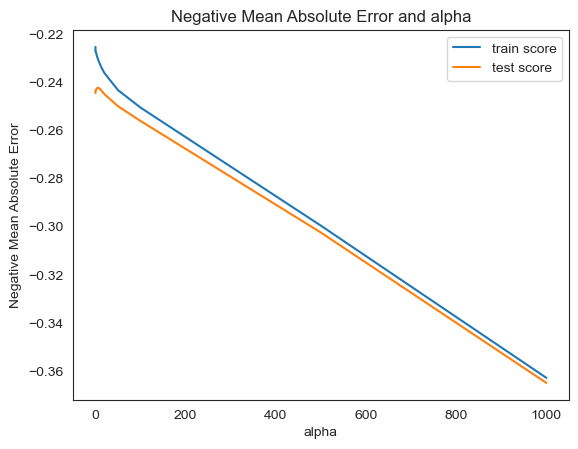

In [113]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [114]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [115]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=8)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.032316846190019115
Coefficients:
 [ 0.2343826   0.16370922  0.27965468  0.22329866  0.35760711 -0.06864348
  0.0763353  -0.04996098 -0.09001574  0.01275423  0.01931049 -0.16747442
 -0.2883802  -0.07508845 -0.03111283  0.24958482  0.17933541  0.01421834
 -0.18187446  0.23398234 -0.11985514 -0.06092526 -0.18177225 -0.19867257
 -0.07600051 -0.07677706 -0.12814384  0.12769451 -0.10751714 -0.05479103
 -0.06833966 -0.06759132  0.17057239  0.10164091  0.01187017 -0.1270409
  0.01662012  0.06245648 -0.10824602 -0.09691937 -0.03880576 -0.01831821
 -0.0616276   0.11816939  0.06866533 -0.02456124 -0.20721388  0.15997426
  0.02737891  0.07584996 -0.07903463 -0.23292256]


# Model Prediction and Evaluation Metrics:

Ridge Regression

In [116]:
##Making predictions for train and test sets: Ridge Regression Model
from sklearn.linear_model import Ridge, Lasso

y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=8.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=8.0):
 ****************************************

For Train Set:
R2 score: 0.8943823378755458 
MSE score: 0.1056176621244542 
MAE score: 0.2318455095704776 
RMSE score: 0.3249887107646267

For Test Set:
R2 score: 0.8829995577179857 
MSE score: 0.11795124311878702 
MAE score: 0.2458851927747851 
RMSE score: 0.34344030502954515 
 ****************************************


In [117]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,GrLivArea,0.3576,0.3576
1,MSSubClass_160,-0.2884,0.2884
2,YearBuilt,0.2797,0.2797
3,MSZoning_FV,0.2496,0.2496
4,OverallQual,0.2344,0.2344
5,Neighborhood_Crawfor,0.2340,0.2340
6,GarageType_No Garage,-0.2329,0.2329
7,TotalBsmtSF,0.2233,0.2233
8,Exterior1st_BrkComm,-0.2072,0.2072
9,Neighborhood_MeadowV,-0.1987,0.1987


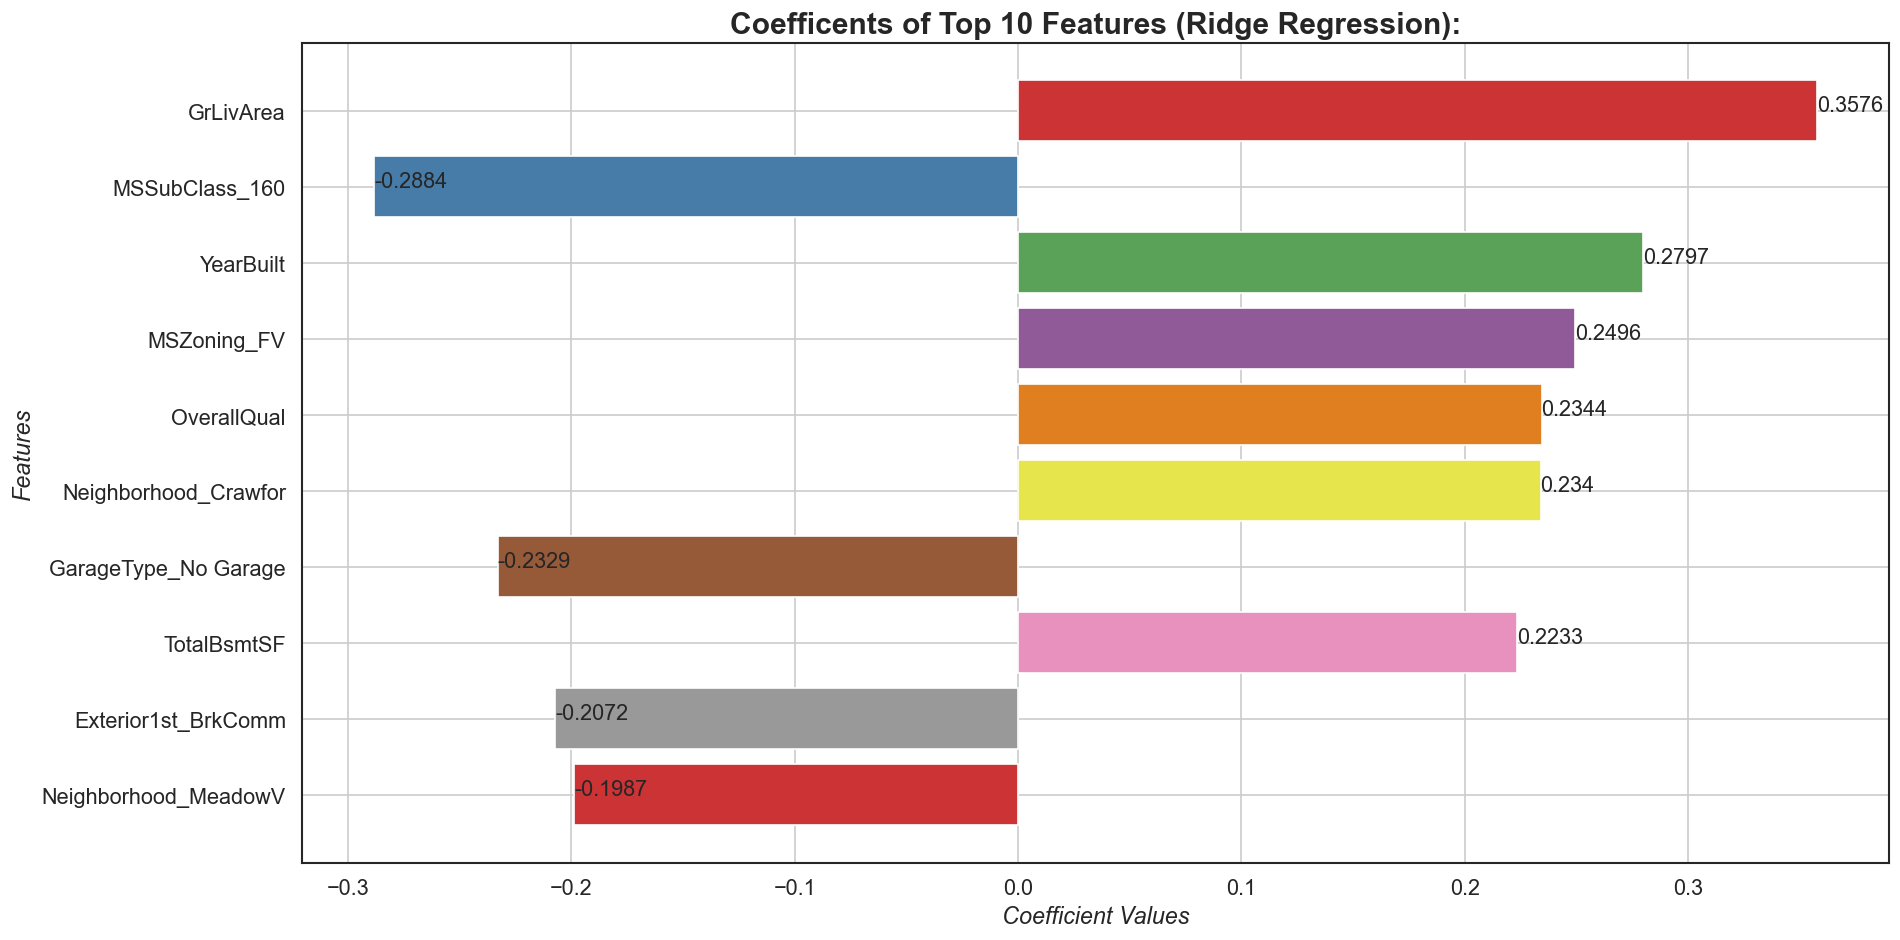

In [118]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

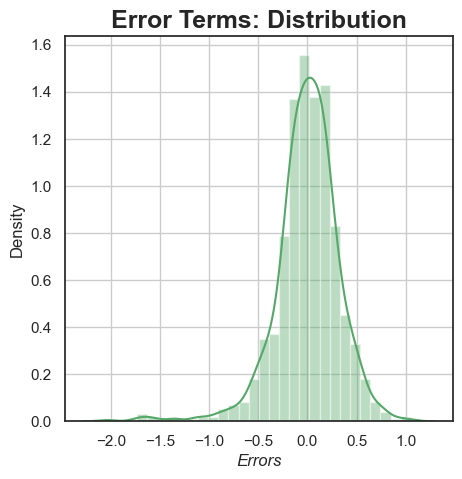

In [119]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

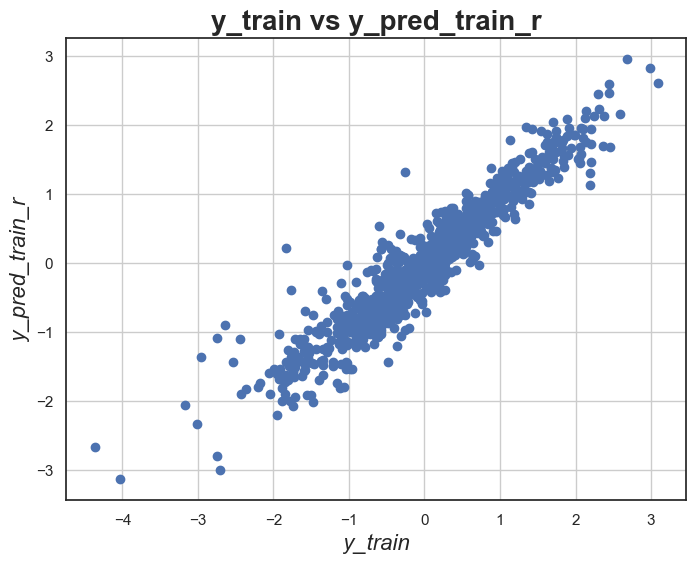

In [120]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

-----------------

In [121]:
y_train.shape

(970,)

For test set

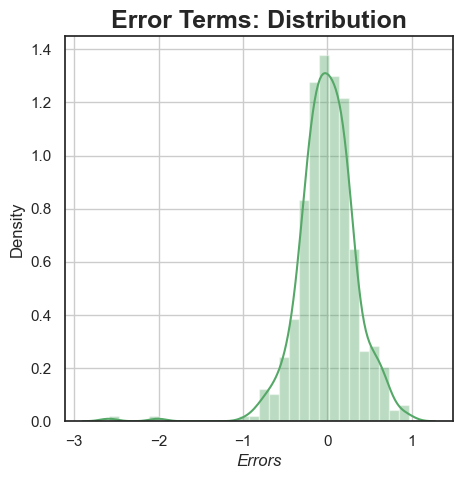

In [122]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

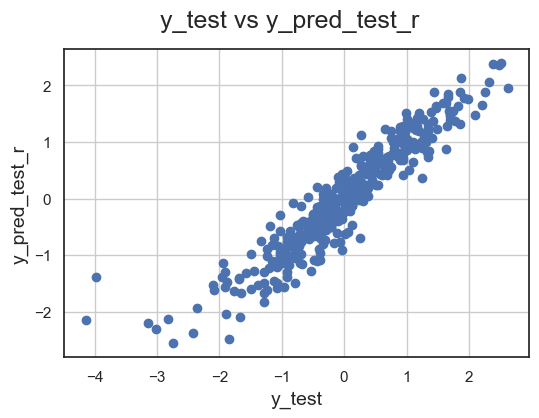

In [123]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [124]:
y_test.shape

(416,)

## Lasso Regression:

In [125]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.0007,-0.228205,-0.242645,1
7,0.0008,-0.228867,-0.242692,2
8,0.0009,-0.229543,-0.242727,3
9,0.001,-0.230215,-0.242784,4
5,0.0006,-0.227663,-0.242796,5
4,0.0005,-0.227178,-0.242951,6
3,0.0003,-0.226366,-0.243431,7
2,0.0002,-0.225903,-0.243761,8
10,0.002,-0.235713,-0.243888,9
1,0.0001,-0.225528,-0.244150,10


In [127]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.0007,-0.228205,-0.242645,1
8,0.0008,-0.228867,-0.242692,2
9,0.0009,-0.229543,-0.242727,3
10,0.001,-0.230215,-0.242784,4
6,0.0006,-0.227663,-0.242796,5
5,0.0005,-0.227178,-0.242951,6
4,0.0004,-0.226749,-0.243157,7
3,0.0003,-0.226366,-0.243431,8
2,0.0002,-0.225903,-0.243761,9
11,0.002,-0.235713,-0.243888,10


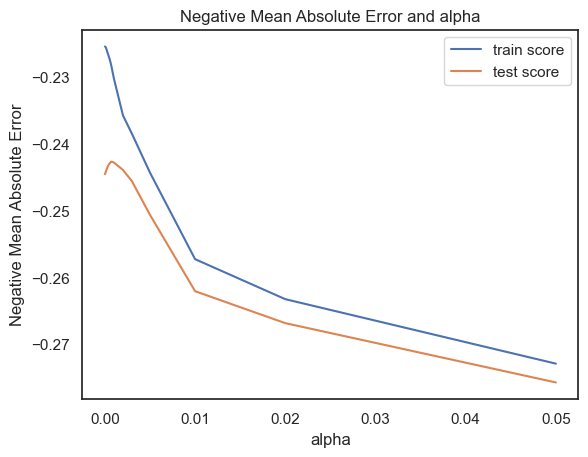

In [129]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [130]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0007)

In [131]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.04574087331126272
Coefficients:
  [ 0.2294487   0.16352693  0.29560281  0.22216069  0.36267836 -0.03751654
  0.         -0.         -0.07676029 -0.          0.         -0.18756753
 -0.36036488 -0.04848769 -0.          0.3036483   0.17361517  0.
 -0.13258357  0.29080312 -0.07882878 -0.03993038 -0.18389204 -0.21083719
 -0.05222133 -0.04826283 -0.10856222  0.14300867 -0.07967937 -0.
 -0.03815232 -0.04167046  0.2132617   0.07935206  0.         -0.
  0.0013988   0.         -0.06755683 -0.09963731 -0.         -0.
 -0.          0.11428838  0.01383382 -0.         -1.03571252  0.17356149
  0.          0.00933425 -0.01679046 -0.2474221 ]


In [132]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.8957922230956412 
MSE score: 0.10420777690435873 
MAE score: 0.23189951061642394 
RMSE score: 0.32281229360784686

For Test Set:
R2 score: 0.8826186020266734 
MSE score: 0.11833529463591849 
MAE score: 0.2448201471842699 
RMSE score: 0.34399897475998165 
 ****************************************


In [133]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Exterior1st_BrkComm,-1.0357,1.0357
1,GrLivArea,0.3627,0.3627
2,MSSubClass_160,-0.3604,0.3604
3,MSZoning_FV,0.3036,0.3036
4,YearBuilt,0.2956,0.2956
5,Neighborhood_Crawfor,0.2908,0.2908
6,GarageType_No Garage,-0.2474,0.2474
7,OverallQual,0.2294,0.2294
8,TotalBsmtSF,0.2222,0.2222
9,Neighborhood_StoneBr,0.2133,0.2133


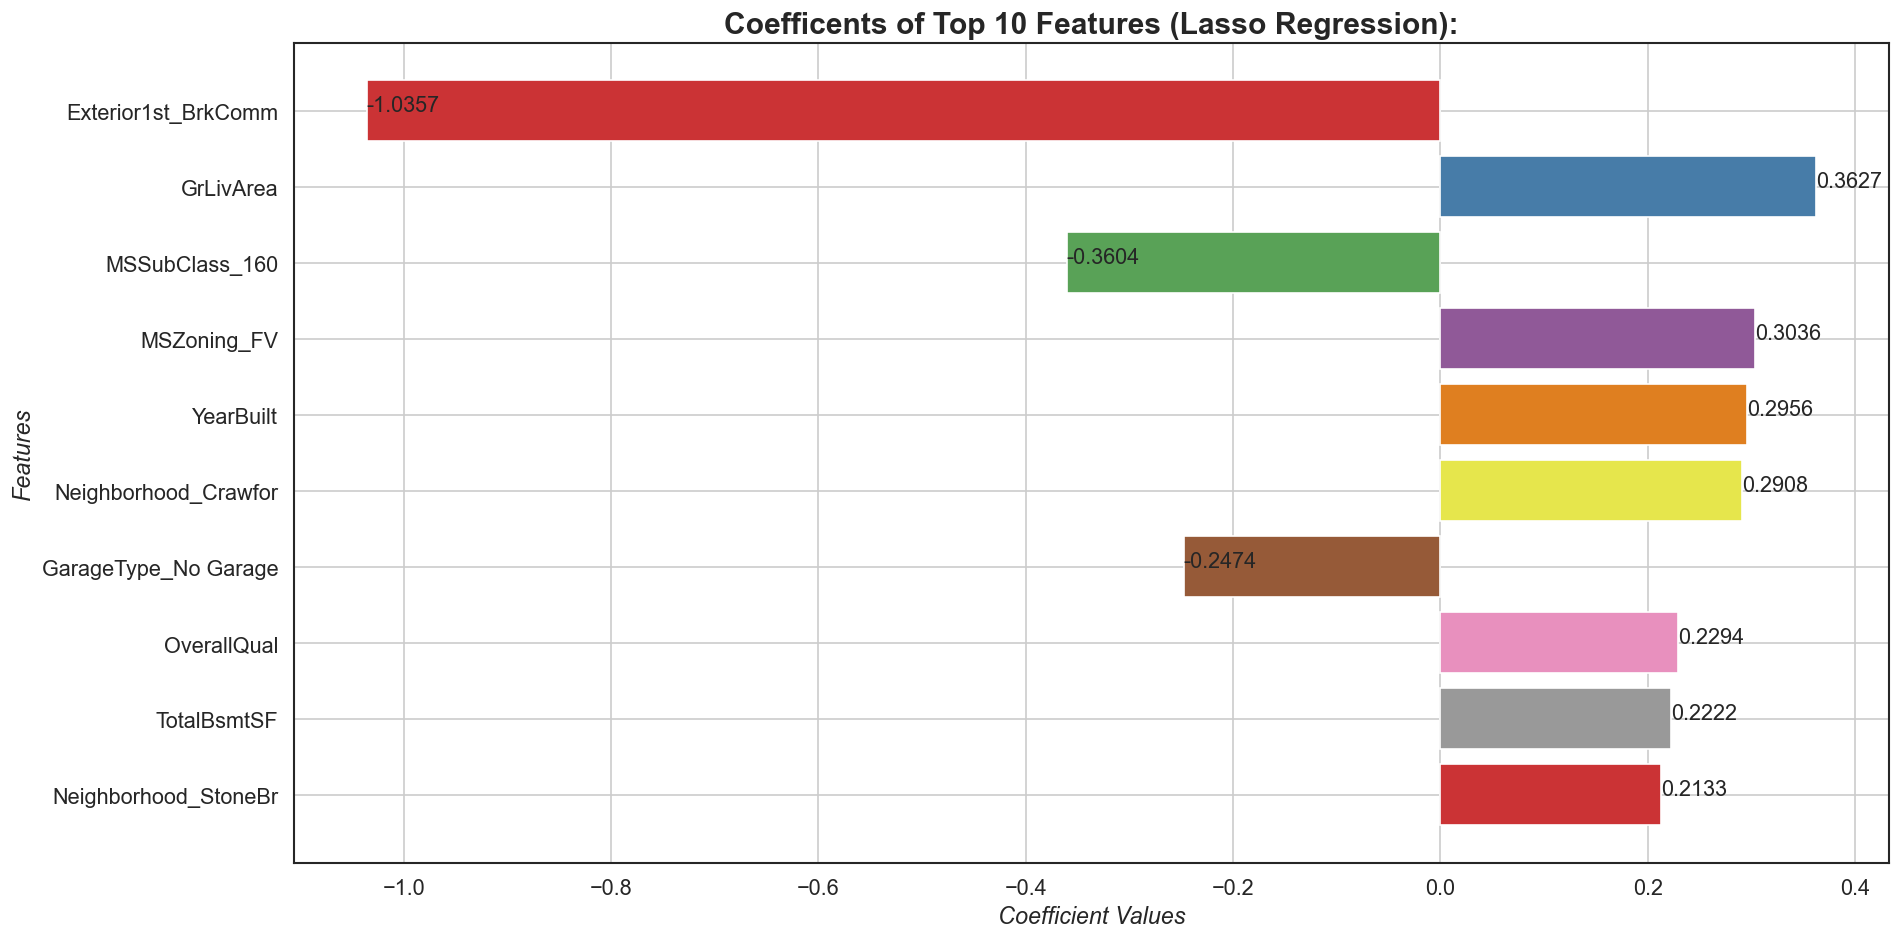

In [134]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [135]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['Exterior1st_BrkComm',
 'GrLivArea',
 'MSSubClass_160',
 'MSZoning_FV',
 'YearBuilt']

In [136]:
import sklearn.metrics
score_lasso=lasso.score(X_test,y_test)
score_ridge=ridge.score(X_test,y_test)
print('Score for Lasso Regression :',score_lasso)
print('Score for Ridge Regression :',score_ridge)

Score for Lasso Regression : 0.8826186020266734
Score for Ridge Regression : 0.8829995577179857


In [137]:
evs_lasso=sklearn.metrics.explained_variance_score(y_test,lasso.predict(X_test))
evs_ridge=sklearn.metrics.explained_variance_score(y_test,ridge.predict(X_test))
print('Explained Variance Score for Lasso Regression:',evs_lasso)
print('Explained Variance Score for Ridge Regression:',evs_ridge)

Explained Variance Score for Lasso Regression: 0.8826302144142314
Explained Variance Score for Ridge Regression: 0.8830291696682281


In [138]:
mse_lasso=sklearn.metrics.mean_squared_error(y_test,lasso.predict(X_test))
mse_ridge=sklearn.metrics.mean_squared_error(y_test,ridge.predict(X_test))
print('Mean Square Error for Lasso Regression:',mse_lasso)
print('Mean Square Error for Ridge Regression:',mse_ridge)

Mean Square Error for Lasso Regression: 0.11833529463591849
Mean Square Error for Ridge Regression: 0.11795124311878702


In [139]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [140]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0007)

In [157]:
# Summary For alpha=5 -> Ridge
ridge = Ridge(alpha=5)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:",ridge.coef_)
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print("For Ridge Regression Model (Doubled alpha model, alpha=5):\n")
print("For Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n")

Intercept:  -0.011179237077548485
Coefficients: [ 0.22683139  0.16273167  0.27785879  0.22245216  0.35776538 -0.07429405
  0.11066469 -0.07101895 -0.10687861 -0.00151868  0.02655384 -0.18478338
 -0.31775304 -0.0892862  -0.03720476  0.26990096  0.18048084  0.02267548
 -0.21097717  0.24542835 -0.13474041 -0.06816222 -0.20911249 -0.25917639
 -0.08763855 -0.09093449 -0.14085058  0.1414051  -0.12443262 -0.07401544
 -0.0832339  -0.0753339   0.19321067  0.12586045  0.02224901 -0.15252281
  0.02643564  0.08910301 -0.13183206 -0.1132219  -0.05986178 -0.02851888
 -0.08597677  0.12075911  0.08318032 -0.03000724 -0.30647961  0.17439318
  0.04224297  0.10513856 -0.09820357 -0.24369082]
For Ridge Regression Model (Doubled alpha model, alpha=5):

For Train Set:
R2 score: 0.89596103088393 
MSE score: 0.10403896911606995 
MAE score: 0.2307079139812286 
RMSE score: 0.32255072332281315

For Test Set:
R2 score: 0.8824218241978985 
MSE score: 0.11853367157424045 
MAE score: 0.24636386922199544 
RMSE score:

In [160]:
## Summary for alpha .0007 ->Lasso
lasso = Lasso(alpha=0.0007)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:.0007)\n")
print("For Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n")

Intercept:  -0.018373444496658654
Coefficients:
  [ 0.22266977  0.16092915  0.28556314  0.22236818  0.35938254 -0.06067099
  0.05750093 -0.02282545 -0.09877294 -0.          0.         -0.19557712
 -0.36492031 -0.07292144 -0.01271957  0.30150415  0.1708195   0.
 -0.18756793  0.28330756 -0.10269939 -0.05588561 -0.21986139 -0.30571202
 -0.07425265 -0.07347921 -0.12834659  0.15373056 -0.11071669 -0.04114393
 -0.06517109 -0.05937195  0.22301488  0.1210761   0.         -0.
  0.02509973  0.         -0.11136062 -0.11052965 -0.         -0.
 -0.          0.11727874  0.0472192  -0.         -1.33368199  0.18473763
  0.          0.071902   -0.06622767 -0.2543562 ]
For Lasso Regression Model: (Doubled alpha model: alpha:.0007)

For Train Set:
R2 score: 0.8977329917078831 
MSE score: 0.10226700829211684 
MAE score: 0.2296637393507003 
RMSE score: 0.3197921329428178

For Test Set:
R2 score: 0.8794055099946343 
MSE score: 0.1215744977708997 
MAE score: 0.246547035792478 
RMSE score: 0.348675347237082 


# Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 5.0
Lasso - 0.0007
The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.10403896911606995 
Lasso - 0.10226700829211684
The Mean Squared Error of Lasso is slightly higher than that of Ridge

Hence based on Lasso, the feature that affect the price are

Exterior1st_BrkComm, GrLivArea, MSSubClass_160,MSZoning_FV, YearBuilt,Neighborhood_Crawfor, GarageType_No Garage,OverallQual,TotalBsmtSF, Neighborhood_StoneBr


# Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed (as it is one of the major assumptions of linear regression).

# For Train Set:

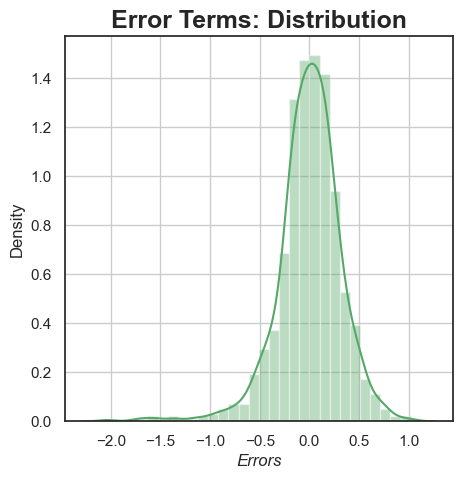

In [141]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

# For test set

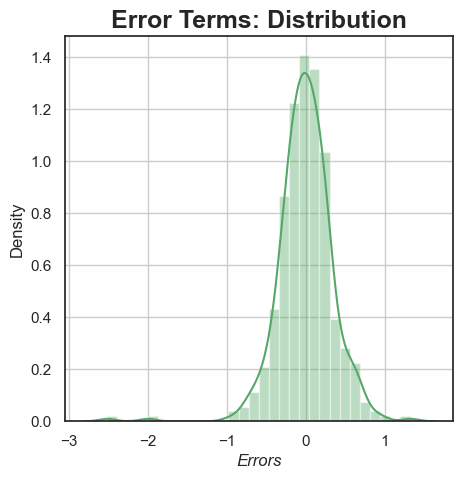

In [142]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

------------------------------------------------------------------------

## Start Solving questions from Problem statement 2

In [143]:
##Choosing coefficient values with double the value of alpha = 5*2 = 10

ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:",ridge.coef_)

Intercept:  -0.04191833115760919
Coefficients: [ 0.23847741  0.16402411  0.28013572  0.22384861  0.35734083 -0.06604421
  0.06307726 -0.04134624 -0.08181107  0.02001601  0.01714523 -0.15825793
 -0.27157289 -0.06821099 -0.02833305  0.23677312  0.17772943  0.01101485
 -0.16828821  0.22594607 -0.11236747 -0.05682505 -0.16836964 -0.17261932
 -0.07002691 -0.06964987 -0.12118454  0.12036113 -0.09978913 -0.0460795
 -0.06088929 -0.06344499  0.15799898  0.090386    0.00822849 -0.11398174
  0.01269211  0.052134   -0.09728121 -0.08872453 -0.03097789 -0.01472845
 -0.05190053  0.11635556  0.06130284 -0.02211311 -0.17079826  0.15157203
  0.02204849  0.06307133 -0.0700941  -0.226346  ]


In [145]:
# For alpha=10 -> Ridge
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:",ridge.coef_)

Intercept:  -0.04191833115760919
Coefficients: [ 0.23847741  0.16402411  0.28013572  0.22384861  0.35734083 -0.06604421
  0.06307726 -0.04134624 -0.08181107  0.02001601  0.01714523 -0.15825793
 -0.27157289 -0.06821099 -0.02833305  0.23677312  0.17772943  0.01101485
 -0.16828821  0.22594607 -0.11236747 -0.05682505 -0.16836964 -0.17261932
 -0.07002691 -0.06964987 -0.12118454  0.12036113 -0.09978913 -0.0460795
 -0.06088929 -0.06344499  0.15799898  0.090386    0.00822849 -0.11398174
  0.01269211  0.052134   -0.09728121 -0.08872453 -0.03097789 -0.01472845
 -0.05190053  0.11635556  0.06130284 -0.02211311 -0.17079826  0.15157203
  0.02204849  0.06307133 -0.0700941  -0.226346  ]


In [146]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

In [148]:
print("For Ridge Regression Model (Doubled alpha model, alpha=10):\n\n")
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n")

For Ridge Regression Model (Doubled alpha model, alpha=10):



For Train Set:
R2 score: 0.8934836530647139 
MSE score: 0.10651634693528603 
MAE score: 0.2325411743897157 
RMSE score: 0.32636842208658307

For Test Set:
R2 score: 0.8829691809709892 
MSE score: 0.11798186672157226 
MAE score: 0.2461110996779056 
RMSE score: 0.34348488572508146 



In [149]:
## Get the top 10 features from ridge regression method
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df , #Top10 features display

ridge_df.head(10)   

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,GrLivArea,0.3573,0.3573
1,YearBuilt,0.2801,0.2801
2,MSSubClass_160,-0.2716,0.2716
3,OverallQual,0.2385,0.2385
4,MSZoning_FV,0.2368,0.2368
5,GarageType_No Garage,-0.2263,0.2263
6,Neighborhood_Crawfor,0.2259,0.2259
7,TotalBsmtSF,0.2238,0.2238
8,MSZoning_RL,0.1777,0.1777
9,Neighborhood_MeadowV,-0.1726,0.1726


In [155]:
ridge_df.Features.head(10)

0               GrLivArea
1               YearBuilt
2          MSSubClass_160
3             OverallQual
4             MSZoning_FV
5    GarageType_No Garage
6    Neighborhood_Crawfor
7             TotalBsmtSF
8             MSZoning_RL
9    Neighborhood_MeadowV
Name: Features, dtype: object

In [150]:
## Doubling the lasso aplha to .0007*2 to.0014

lasso = Lasso(alpha=0.0014)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.07503659611057624
Coefficients:
  [ 0.23753178  0.16619679  0.30343494  0.22117558  0.36635123 -0.00991564
  0.         -0.         -0.05236936  0.          0.         -0.17498242
 -0.35126182 -0.01109506 -0.          0.30414431  0.17777147  0.
 -0.07596636  0.29162462 -0.05961147 -0.02010876 -0.14407311 -0.12500555
 -0.02488988 -0.02272103 -0.08693536  0.13054067 -0.0537781  -0.
 -0.00860593 -0.01932275  0.19382762  0.02651399  0.         -0.
  0.          0.         -0.04272261 -0.08776035 -0.         -0.
 -0.          0.1102817   0.         -0.         -0.63558121  0.16105173
  0.          0.         -0.         -0.24124474]


In [151]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n")

For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)


For Train Set:
R2 score: 0.8933016147706447 
MSE score: 0.10669838522935521 
MAE score: 0.2341276223208833 
RMSE score: 0.32664718769546325

For Test Set:
R2 score: 0.885039186780521 
MSE score: 0.11589503906746083 
MAE score: 0.24347076828049935 
RMSE score: 0.3404336044920666 



In [152]:
##Finding the important features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Exterior1st_BrkComm,-0.6356,0.6356
1,GrLivArea,0.3664,0.3664
2,MSSubClass_160,-0.3513,0.3513
3,MSZoning_FV,0.3041,0.3041
4,YearBuilt,0.3034,0.3034
5,Neighborhood_Crawfor,0.2916,0.2916
6,GarageType_No Garage,-0.2412,0.2412
7,OverallQual,0.2375,0.2375
8,TotalBsmtSF,0.2212,0.2212
9,Neighborhood_StoneBr,0.1938,0.1938


In [154]:
lasso_df.Features.head(10)

0     Exterior1st_BrkComm
1               GrLivArea
2          MSSubClass_160
3             MSZoning_FV
4               YearBuilt
5    Neighborhood_Crawfor
6    GarageType_No Garage
7             OverallQual
8             TotalBsmtSF
9    Neighborhood_StoneBr
Name: Features, dtype: object

## Question 3
For this question need to drop the top 5 features from dataset, and rebuild the model.

In [164]:
df= df_new1
##Removing these top5 features of lasso
df= df.drop(top5_original_lasso_features, axis=1)
df.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,...,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage
0,65.0,8450,7,5,2003,196.0,706,150,856,1,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,6,8,1976,0.0,978,284,1262,0,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,2002,162.0,486,434,920,1,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,7,5,1970,0.0,216,540,756,1,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,350.0,655,490,1145,1,...,0,0,0,0,0,1,0,0,0,0


In [165]:
# find binary coloums
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)

In [166]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [167]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols =df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler fit_transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [168]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

##Storing other vars to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [170]:
#RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 50)            
rfe = rfe.fit(X_train, y_train)

In [171]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('BsmtFullBath', False, 2),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('MoSold', False, 2),
 ('YrSold', False, 2),
 ('d_LotShape', False, 2),
 ('d_HeatingQC', False, 2),
 ('IsRemodel', False, 2),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 2),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 2),
 ('MSSubClass_85', False, 2),
 ('MSSubClass_90', False, 2),
 ('MSSubClass_120', False, 2),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', False, 2),
 ('LotConfig_CulDSac', False, 2),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', T

In [172]:
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['OverallQual', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_180', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Foundation_Slab',
       'Foundation_Wood', 'MasVnrTyp_Stone', 'RoofStyle_Mansard',
       'RoofStyle_Sh

In [173]:
top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking']) # assign the 50 features selected using RFE to a dataframe and view them

top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)

top50_df

,Features,rfe_support,rfe_ranking
0,OverallQual,True,1
1,TotalBsmtSF,True,1
2,FullBath,True,1
3,HalfBath,True,1
4,MSSubClass_30,True,1
5,MSSubClass_40,True,1
6,MSSubClass_45,True,1
7,MSSubClass_60,True,1
8,MSSubClass_70,True,1
9,MSSubClass_75,True,1


In [175]:
# assign 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [176]:
##Lasso Regression Model Building
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

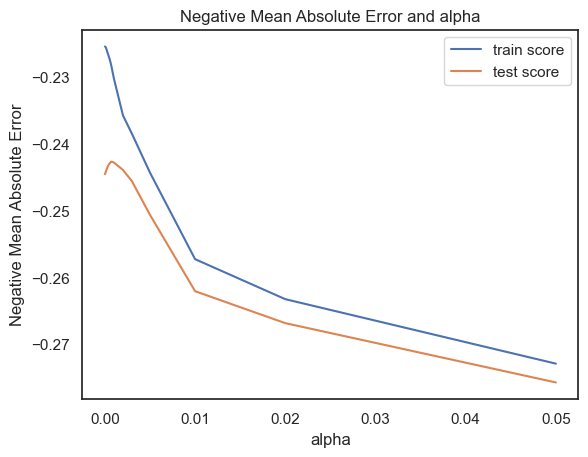

In [178]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [179]:
# Find the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [181]:
lasso = Lasso(alpha=0.0004)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  0.16426639070614146
Coefficients:
 [ 0.33452641  0.36012952  0.12691124  0.10228442 -0.30204059  0.07287677
 -0.45456614  0.27872412  0.14650728  0.39971866  0.15156642 -0.08715253
 -0.0187192  -0.         -0.90876508 -0.12163611  0.23206925 -0.05897283
  0.37222647 -0.29471075 -0.21007954 -0.66457932 -0.88563704 -0.13199342
 -0.16171177 -0.         -0.17442714 -0.40484608 -0.24415822 -0.14795938
 -0.15708344  0.0830004   0.         -0.71624407  0.13651956 -0.30870215
 -0.12559179  0.         -0.29028725  0.3203452   0.          0.13787694
  0.05631576  0.17802307  0.10370616  0.11383485  0.04697746  0.22966211
 -0.21609526 -0.33580105]


In [182]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head()

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Neighborhood_BrDale,-0.9088,0.9088
1,Neighborhood_MeadowV,-0.8856,0.8856
2,Exterior2nd_Brk Cmn,-0.7162,0.7162
3,Neighborhood_IDOTRR,-0.6646,0.6646
4,MSSubClass_45,-0.4546,0.4546


In [187]:
top5_lasso_df= lasso_df.loc[:4]= lasso_df.loc[:4]
print("The top5 important predictor variables after dropping the previous top 5:\n",list(top5_lasso_df['Features']),"\n")

The top5 important predictor variables after dropping the previous top 5:
 ['Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Exterior2nd_Brk Cmn', 'Neighborhood_IDOTRR', 'MSSubClass_45'] 

